In [ ]:
import numpy as np
import pandas as pd
import scipy
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
train_df = pd.read_csv('drive/MyDrive/ML/mlcourse.ai/A4/howpop_train.csv')
test_df  = pd.read_csv('drive/MyDrive/ML/mlcourse.ai/A4/howpop_test.csv')
train_df.head(2).T

,0,1
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/
domain,habrahabr.ru,habrahabr.ru
post_id,18284,18285
published,2008-01-01 18:19:00,2008-01-01 18:30:00
author,@Tapac,@DezmASter
flow,develop,design
polling,False,False
content_len,4305,7344
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1


In [ ]:
train_df.shape, test_df.shape

((134137, 17), (3990, 9))

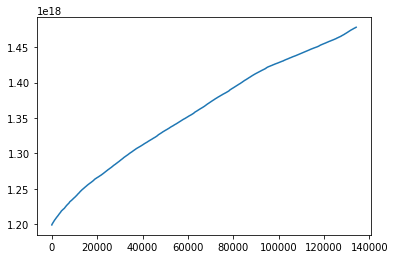

In [ ]:
train_df['published'].apply(lambda ts: pd.to_datetime(ts).value).plot();

In [ ]:
(train_df.corr() > 0.9).count()

post_id             11
polling             11
content_len         11
comments            11
favs                11
views               11
votes_plus          11
votes_minus         11
views_lognorm       11
favs_lognorm        11
comments_lognorm    11
dtype: int64

In [ ]:
pd.DatetimeIndex(pd.to_datetime(train_df['published'])).year.value_counts()

2015    23452
2016    16316
2014    16180
2012    15972
2013    15537
2011    15063
2010    13091
2009    10783
2008     7743
Name: published, dtype: int64

In [ ]:
features = ['author', 'flow', 'domain','title']
train_size = int(0.7 * train_df.shape[0])


In [ ]:
len(train_df), train_size

(134137, 93895)

In [ ]:
X, y = train_df.loc[:, features],  train_df['favs_lognorm'] 

X_test = test_df.loc[:, features]

In [ ]:
X_train, X_valid = X.iloc[:train_size, :], X.iloc[train_size:,:]

y_train, y_valid = y.iloc[:train_size], y.iloc[train_size:]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 3))

In [ ]:
X_train_title = vectorizer_title.fit_transform(X_train['title'])
X_valid_title = vectorizer_title.transform(X_valid['title'])
X_test_title = vectorizer_title.transform(X_test['title'])
df = pd.DataFrame(X_train_title[0].T.todense(),
index=vectorizer_title.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

                      TF-IDF
блоггерам           0.540986
новогодний подарок  0.487266
новогодний          0.429633
подарок             0.397010
wordpress           0.357357
от инженера до      0.000000
от интернет         0.000000
от интернета        0.000000
от информации       0.000000
от использования    0.000000
от кассы            0.000000
от команды          0.000000
от команды mozilla  0.000000
от компании         0.000000
00                  0.000000
от компьютера       0.000000
от инженера         0.000000
от копирайта        0.000000
от копирования      0.000000
от краж             0.000000
от кражи            0.000000
от лишних           0.000000
от любви            0.000000
от любви до         0.000000
от марка            0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectorizer_title.vocabulary_

{'новогодний': 31497,
 'подарок': 36257,
 'блоггерам': 14241,
 'wordpress': 12172,
 'новогодний подарок': 31499,
 'сумасшедшие': 45476,
 'яйца': 50489,
 'или': 22661,
 'сервис': 42745,
 'для': 18811,
 'отслеживания': 34225,
 'посетителей': 37373,
 'или сервис': 22833,
 'сервис для': 42751,
 'для отслеживания': 19413,
 'или сервис для': 22834,
 'сервис для отслеживания': 42753,
 'сглаживание': 42460,
 'шрифтов': 49862,
 'отрисовка': 34214,
 'сглаживание шрифтов': 42461,
 'почему': 37632,
 'мне': 28231,
 'не': 30755,
 'нравится': 31925,
 'iphone': 5951,
 'почему мне': 37659,
 'мне не': 28233,
 'не нравится': 30851,
 'всеобщая': 16456,
 'доступность': 20285,
 'действии': 18272,
 'чем': 49165,
 'суть': 45504,
 'проекта': 39310,
 'ru': 9541,
 'search': 9842,
 'запускается': 21584,
 'понедельник': 37201,
 'mobile': 7315,
 'выбор': 16759,
 'способа': 44575,
 'связи': 42437,
 'обзор': 32095,
 'под': 36147,
 'windows': 11973,
 'под windows': 36185,
 'онлайн': 33063,
 'банкинг': 13661,
 'оформле

In [ ]:
X_train_title.shape, X_valid_title.shape, X_test_title.shape

((93895, 50624), (40242, 50624), (3990, 50624))

In [ ]:
vectorizer_title.vocabulary_['python']

9065

In [ ]:
vectorizer_title_ch = TfidfVectorizer(analyzer='char', min_df=3, max_df=0.3, ngram_range=(1, 3))
X_train_title_ch = vectorizer_title_ch.fit_transform(X_train['title'])
X_valid_title_ch = vectorizer_title_ch.transform(X_valid['title'])
X_test_title_ch = vectorizer_title_ch.transform(X_test['title'])



In [ ]:
vectorizer_title_ch.vocabulary_

{'—': 32583,
 'w': 17857,
 'd': 8578,
 'p': 14478,
 '2': 4951,
 '.': 3577,
 '3': 5268,
 'но': 26220,
 'во': 21174,
 'ог': 26705,
 'го': 21561,
 'од': 26723,
 'дн': 21912,
 'ий': 23787,
 'й ': 24192,
 'по': 27472,
 'да': 21750,
 'ар': 20272,
 'ок': 26863,
 'к ': 24499,
 ' б': 1325,
 'бл': 20694,
 'ло': 25201,
 'гг': 21470,
 'ге': 21479,
 'ер': 22643,
 'ам': 20171,
 'м ': 25424,
 ' —': 1842,
 '— ': 32584,
 ' w': 1114,
 'wo': 18051,
 'or': 14288,
 'rd': 15386,
 'dp': 9012,
 'pr': 14892,
 're': 15415,
 'es': 9761,
 'ss': 16330,
 's ': 15800,
 ' 2': 211,
 '2.': 5041,
 '.3': 3714,
 '3.': 5354,
 '.2': 3702,
 'нов': 26234,
 'ово': 26689,
 'вог': 21188,
 'ого': 26719,
 'год': 21577,
 'одн': 26747,
 'дни': 21916,
 'ний': 26166,
 'ий ': 23788,
 'й п': 24249,
 ' по': 1592,
 'под': 27483,
 'ода': 26735,
 'дар': 21774,
 'аро': 20294,
 'рок': 28003,
 'ок ': 26864,
 'к б': 24544,
 ' бл': 1333,
 'бло': 20699,
 'лог': 25215,
 'огг': 26712,
 'гге': 21471,
 'гер': 21496,
 'ера': 22655,
 'рам': 27763,
 'ам

In [ ]:
feats = ['author', 'flow', 'domain']
X_train[feats][:5]

,author,flow,domain
0,@Tapac,develop,habrahabr.ru
1,@DezmASter,design,habrahabr.ru
2,@DezmASter,design,habrahabr.ru
3,@Taoorus,design,habrahabr.ru
4,@dennydo,NaN,geektimes.ru


In [ ]:
X_train[feats][:5].fillna('-')

,author,flow,domain
0,@Tapac,develop,habrahabr.ru
1,@DezmASter,design,habrahabr.ru
2,@DezmASter,design,habrahabr.ru
3,@Taoorus,design,habrahabr.ru
4,@dennydo,-,geektimes.ru


In [ ]:
dict_vect = DictVectorizer()
dict_vect_matrix = dict_vect.fit_transform(X_train[feats][:5].fillna('-').T.to_dict().values())
dict_vect_matrix

<5x9 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [ ]:
dict_vect_matrix.toarray()

array([[0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0.]])

In [ ]:
dict_vect_matrix.shape

(5, 9)

In [ ]:
for col in feats:
    print(col,len(X_train[col][:5].fillna('-').unique()))


author 4
flow 3
domain 2


In [ ]:
dict_vect.feature_names_

['author=@DezmASter',
 'author=@Taoorus',
 'author=@Tapac',
 'author=@dennydo',
 'domain=geektimes.ru',
 'domain=habrahabr.ru',
 'flow=-',
 'flow=design',
 'flow=develop']

In [ ]:
X_train[feats]

,author,flow,domain
0,@Tapac,develop,habrahabr.ru
1,@DezmASter,design,habrahabr.ru
2,@DezmASter,design,habrahabr.ru
3,@Taoorus,design,habrahabr.ru
4,@dennydo,NaN,geektimes.ru
...,...,...,...
93890,@YuriyIvon,develop,habrahabr.ru
93891,@marks,NaN,geektimes.ru
93892,NaN,develop,habrahabr.ru
93893,@marks,NaN,geektimes.ru


In [ ]:
pd.get_dummies(X_train[feats].fillna('-'))

,author_-,author_@0000168,author_@01000110110010010010,author_@03uk,author_@047,author_@069056,author_@0dd_b1t,author_@0decca,author_@0dmin,author_@0leGG,author_@0lgaShulgina,author_@0lorin,author_@0n1x,author_@0n1y_0ne,author_@0nly0ne,author_@0range,author_@0serd0,author_@0serg,author_@0ver,author_@0x0FFF,author_@0x3f00,author_@0x62ash,author_@0x656b694d,author_@0xA0,author_@0xBA0BAB,author_@0xFE,author_@0xd34df00d,author_@0xy,author_@0zon,author_@100chuk,author_@100xkg,author_@1010101001000100110100111,author_@1024,author_@1099511627776,author_@10s,author_@1101_debian,author_@11101010,author_@1111paha1111,author_@1337,author_@13alex,...,author_@ztxn,author_@zubans,author_@zuborg,author_@zukoff,author_@zurapa,author_@zurbaganin,author_@zuskin,author_@zuyac,author_@zuzusik,author_@zv347,author_@zvasil,author_@zvic,author_@zvirusz,author_@zviryatko,author_@zvulon,author_@zw0rk,author_@zwer2s,author_@zxcabs,author_@zxcvbnnm,author_@zxzxzx,author_@zyablikov,author_@zyafa,author_@zyaleniyeg,author_@zyrik,author_@zyss,author_@zz_wolf,author_@zzeneg,author_@zzeng,author_@zzeus,author_@zzion,author_@zzzzzzerg,flow_-,flow_admin,flow_design,flow_develop,flow_management,flow_marketing,flow_misc,domain_geektimes.ru,domain_habrahabr.ru
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
93891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
93892,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
93893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
vectorizer_feats = DictVectorizer()
X_train_feats = vectorizer_feats.fit_transform(X_train[feats].fillna('-').T.to_dict().values())
X_valid_feats = vectorizer_feats.transform(X_valid[feats].fillna('-').T.to_dict().values())
X_test_feats = vectorizer_feats.transform(X_test[feats].fillna('-').T.to_dict().values())
print(X_train_feats)

  (0, 6061)	1.0
  (0, 17861)	1.0
  (0, 17865)	1.0
  (1, 1821)	1.0
  (1, 17861)	1.0
  (1, 17864)	1.0
  (2, 1821)	1.0
  (2, 17861)	1.0
  (2, 17864)	1.0
  (3, 6060)	1.0
  (3, 17861)	1.0
  (3, 17864)	1.0
  (4, 9308)	1.0
  (4, 17860)	1.0
  (4, 17862)	1.0
  (5, 12595)	1.0
  (5, 17861)	1.0
  (5, 17865)	1.0
  (6, 7126)	1.0
  (6, 17860)	1.0
  (6, 17862)	1.0
  (7, 677)	1.0
  (7, 17861)	1.0
  (7, 17868)	1.0
  (8, 12229)	1.0
  :	:
  (93886, 17862)	1.0
  (93887, 12790)	1.0
  (93887, 17860)	1.0
  (93887, 17862)	1.0
  (93888, 0)	1.0
  (93888, 17861)	1.0
  (93888, 17865)	1.0
  (93889, 8085)	1.0
  (93889, 17861)	1.0
  (93889, 17865)	1.0
  (93890, 6936)	1.0
  (93890, 17861)	1.0
  (93890, 17865)	1.0
  (93891, 12790)	1.0
  (93891, 17860)	1.0
  (93891, 17862)	1.0
  (93892, 0)	1.0
  (93892, 17861)	1.0
  (93892, 17865)	1.0
  (93893, 12790)	1.0
  (93893, 17860)	1.0
  (93893, 17862)	1.0
  (93894, 5395)	1.0
  (93894, 17861)	1.0
  (93894, 17865)	1.0


In [ ]:
X_train_feats.shape

(93895, 17869)

In [ ]:
X_train_new = scipy.sparse.hstack([X_train_title, X_train_feats, X_train_title_ch])
X_valid_new = scipy.sparse.hstack([X_valid_title, X_valid_feats, X_valid_title_ch])
X_test_new =  scipy.sparse.hstack([X_test_title, X_test_feats, X_test_title_ch])
print(X_train_new)

  (0, 31499)	0.48726641319857844
  (0, 12172)	0.3573573637346043
  (0, 14241)	0.5409859227967682
  (0, 36257)	0.3970099090254531
  (0, 31497)	0.42963300690772865
  (1, 42753)	0.3580236302895723
  (1, 22834)	0.3580236302895723
  (1, 19413)	0.31988193292426853
  (1, 42751)	0.26189995546790323
  (1, 22833)	0.33178163836886093
  (1, 37373)	0.2851710222490856
  (1, 34225)	0.3131626487935626
  (1, 18811)	0.1044678810457604
  (1, 42745)	0.19793741718146401
  (1, 22661)	0.14166677806301395
  (1, 50489)	0.300041652833207
  (1, 45476)	0.35080262513567845
  (2, 42753)	0.3580236302895723
  (2, 22834)	0.3580236302895723
  (2, 19413)	0.31988193292426853
  (2, 42751)	0.26189995546790323
  (2, 22833)	0.33178163836886093
  (2, 37373)	0.2851710222490856
  (2, 34225)	0.3131626487935626
  (2, 18811)	0.1044678810457604
  :	:
  (93893, 71412)	0.04742918755554645
  (93893, 98906)	0.041019867780227454
  (93893, 83385)	0.0727782819413009
  (93893, 88765)	0.046798435492314064
  (93893, 95216)	0.0415995037238586

In [ ]:
from sklearn.linear_model import Ridge
model1 = Ridge(alpha=0.1, random_state=1).fit(X_train_new, y_train)


In [ ]:
train_preds1 = model1.predict(X_train_new)
valid_preds1 = model1.predict(X_valid_new)

print('Ошибка на трейне',mean_squared_error(y_train, train_preds1))
print('Ошибка на тесте',mean_squared_error(y_valid, valid_preds1))

Ошибка на трейне 0.10689324479602047
Ошибка на тесте 0.9728695967696782


In [ ]:
model2 =  Ridge(alpha=1, random_state=1).fit(X_train_new, y_train)

train_preds2 = model2.predict(X_train_new)
valid_preds2 = model2.predict(X_valid_new)

print('Ошибка на трейне',mean_squared_error(y_train, train_preds2))
print('Ошибка на тесте',mean_squared_error(y_valid, valid_preds2))

Ошибка на трейне 0.2364767941989759
Ошибка на тесте 0.6917184203155636


In [ ]:
X_train_baseline = scipy.sparse.vstack([X_train_new, X_valid_new])

model = Ridge().fit(X_train_baseline, y)

test_preds = model.predict(X_test_new)

In [ ]:
np.savetxt('prediction.csv',test_preds, delimiter=",", header = 'favs_lognorm', inde)


SyntaxError: ignored

In [ ]:
pd.DataFrame(test_preds).to_csv('/test_csv.csv', mode='a', index=True)